In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Assistant
To plot the first 100 Fibonacci numbers, we can use the matplotlib library in Python. We will first calculate the Fibonacci numbers and then create a plot to visualize them.

Here's the code to achieve this:


In [8]:
# import matplotlib.pyplot as plt

# # Function to calculate Fibonacci numbers
# def fibonacci(n):
#     fib = [0, 1]
#     for i in range(2, n):
#         fib.append(fib[i-1] + fib[i-2])
#     return fib

# # Calculate the first 100 Fibonacci numbers
# fib_sequence = fibonacci(100)

# # Plot the Fibonacci numbers
# plt.plot(fib_sequence, marker='o', linestyle='-')
# plt.title('First 100 Fibonacci Numbers')
# plt.xlabel('Index')
# plt.ylabel('Fibonacci Number')
# plt.show()


In this code, we define a function to calculate the Fibonacci numbers up to a given index. We then use this function to calculate the first 100 Fibonacci numbers and plot them using matplotlib.

In [10]:
# Read the CSV file "economic_index.csv" into a pandas DataFrame and store it in the variable df_index
df_index = pd.read_csv(r"economic_index.csv")

In [11]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [12]:
df_index.columns

Index(['Unnamed: 0', 'year', 'month', 'interest_rate', 'unemployment_rate',
       'index_price'],
      dtype='object')

## here we can see unnecessory columns so this columns we drop .
# our independent feature is interest_rate and unemployment_rate and dependent feature is index_price . along of this all i will remove unnesccoru column

In [19]:
df_index.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)

In [21]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [23]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

C:\Users\Harsh Bhanushali\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harsh Bhanushali\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harsh Bhanushali\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


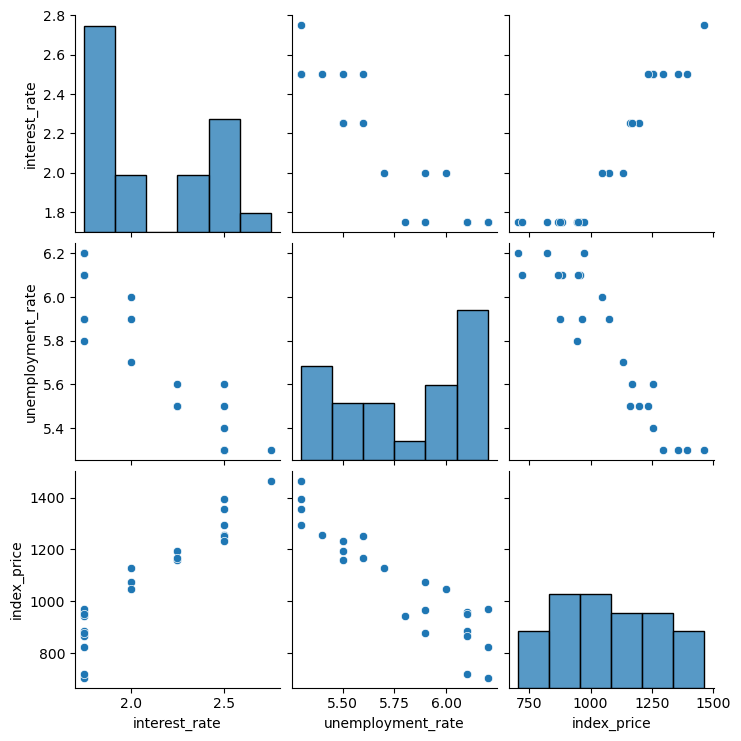

In [25]:
## lets do sum visulization
sns.pairplot(df_index)

# in this pairplot we easily see the linear relationship between independent column and depencdent column

In [27]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemploment Rate')

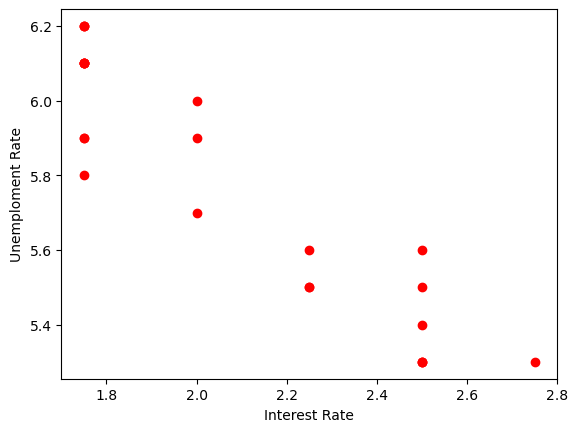

In [28]:
## visulize the datapoints more closely
plt.scatter(x=df_index['interest_rate'],y=df_index['unemployment_rate'],color='r')
plt.xlabel('Interest Rate')
plt.ylabel('Unemploment Rate')

In [29]:
## get my independent and dependent feature
X=df_index[['interest_rate','unemployment_rate']] # this is first method another method is 
# X=df_index.iloc[:,:-1]
y=df_index['index_price']
y=df_index.iloc[:,-1]

In [32]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [36]:
 y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [38]:
## train test split our data
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [42]:
X_train.shape

(18, 2)

# regplot() method is used to plot data and draw a linear regression model fit.

<Axes: xlabel='interest_rate', ylabel='index_price'>

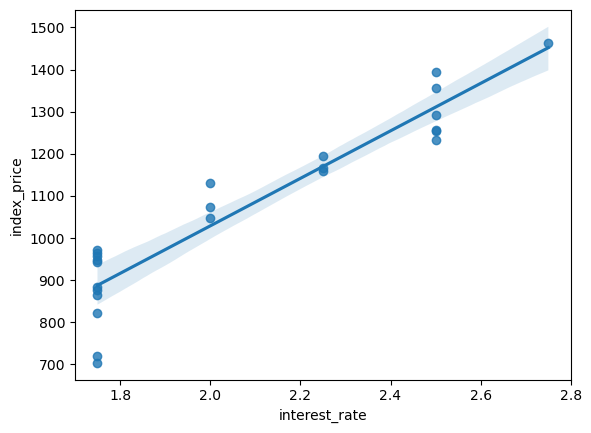

In [45]:
sns.regplot(x=df_index['interest_rate'],y=df_index['index_price']) ## this is called reg plot or regression plot

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

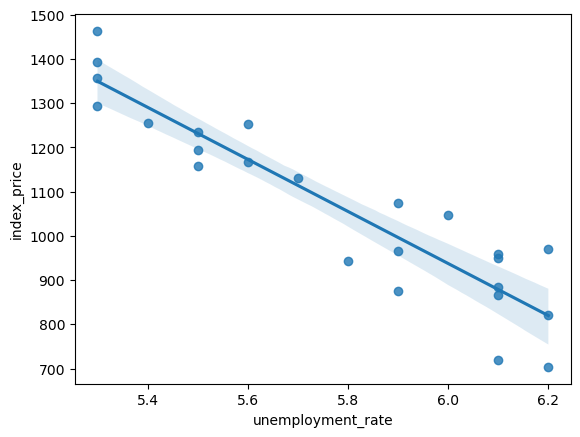

In [47]:
sns.regplot(x=df_index['unemployment_rate'],y=df_index['index_price'])

## In machine learning, a scaler is a linear transformer that normalizes the range of independent variables or features in a dataset. Scalers differ in how they estimate the parameters used to shift and scale each feature. 


## Standard Scaler :: StandardScaler in Python is a preprocessing technique available in the scikit-learn library. It's used to standardize features by removing the mean and scaling to unit variance.
### What does it do?
Removes the mean:
It subtracts the mean of each feature from all its data points, making the mean of the transformed feature 0.
Scales to unit variance:
It divides each feature by its standard deviation, ensuring that the transformed feature has a variance of 1.
Why use it?
Many machine learning algorithms assume that the data is normally distributed and that all features are on the same scale. StandardScaler helps achieve this by transforming the data to have a mean of 0 and a standard deviation of 1. This can lead to better performance in several ways:
Improved convergence speed: Algorithms like gradient descent can converge faster on standardized data.
Fairer feature weighting: Features with large scales won't dominate the learning process.
Better performance in distance-based algorithms: Algorithms like K-Nearest Neighbors are sensitive to feature scales.


In [51]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [55]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [57]:
from sklearn.linear_model import LinearRegression

In [59]:
regression=LinearRegression()

In [61]:
regression.fit(X_train,y_train)

LinearRegression()

In [63]:
## cross validation

from sklearn.model_selection import cross_val_score

In [65]:
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [67]:
np.mean(validation_score)

-5914.828180162388

In [69]:
## now we do prediction
y_pred=regression.predict(X_test)

In [71]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [73]:
## performnace metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [75]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("MSE :",mse)
print("MAE :",mae)
print("R-MSE :",rmse)

MSE : 8108.567426306604
MAE : 73.80444932337097
R-MSE : 90.04758423359621


In [77]:
score=r2_score(y_test,y_pred)
print("Accuracy Score :",score)

Accuracy Score : 0.7591371539010257


In [83]:
# adjusted R -squared
print("Adjusted R-square",1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Adjusted R-square 0.5985619231683761


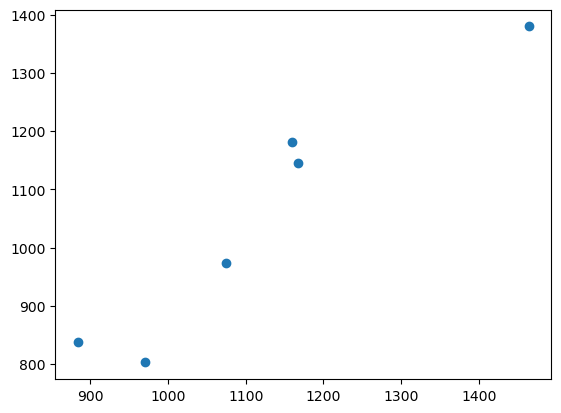

In [85]:
## Assumtions
plt.scatter(y_test,y_pred)

In [89]:
residuals=y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


C:\Users\Harsh Bhanushali\AppData\Local\Temp\ipykernel_12844\1427006691.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)
C:\Users\Harsh Bhanushali\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='index_price', ylabel='Density'>

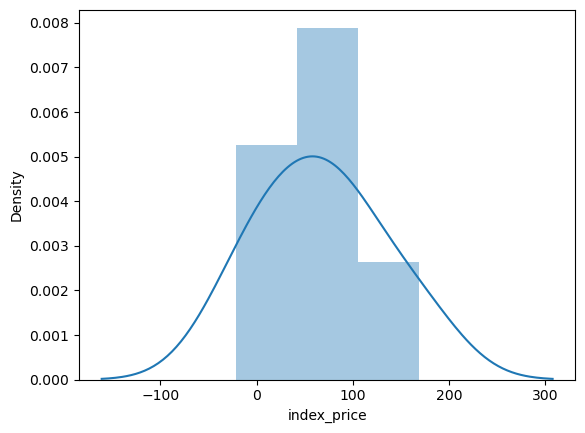

In [105]:
## plot this residuals
sns.distplot(residuals,kde=True)

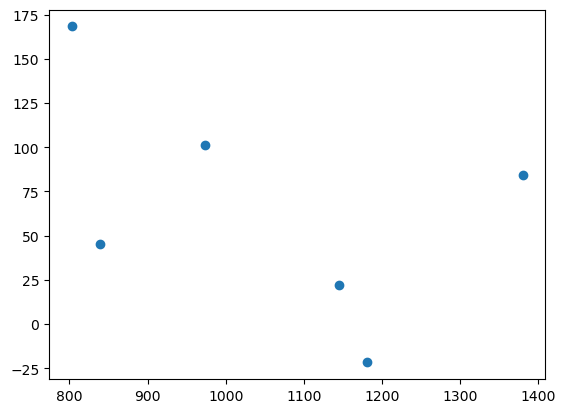

In [109]:
# scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)

In [123]:
## Using OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [125]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 13 Jul 2024   Prob (F-statistic):                       0.754
Time:                        20:51:43   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\Harsh Bhanushali\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
